In [1]:
import nbsetup
import numpy as np
import seaborn as sns
from helpers.entropy import ErgodicEnsemble

In [27]:
from mesa import Agent, Model
from mesa.time import RandomActivation


class MoneyAgent(Agent):
    """An agent with fixed initial wealth."""
    def __init__(self, unique_id, model, spread=5):
        super().__init__(unique_id, model)
        self.wealth = np.random.choice([0,spread],p=[0.5, 0.5])
    
    def step(self):
        if self.wealth == 0:
            return
        other_agent = self.random.choice(self.model.schedule.agents)
        other_agent.wealth += 1
        self.wealth -= 1

        
class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N, spread=5):
        self.num_agents = N
        self.schedule = RandomActivation(self)
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self, spread)
            self.schedule.add(a)

    def step(self):
        '''Advance the model by one step.'''
        self.schedule.step()

Ensembles count: 100
Ergodic entropy: 2.503
Average ensemble entropy: 1.673
Ergodic Complexity: 0.830

Ensembles count: 100
Ergodic entropy: 2.625
Average ensemble entropy: 2.139
Ergodic Complexity: 0.486



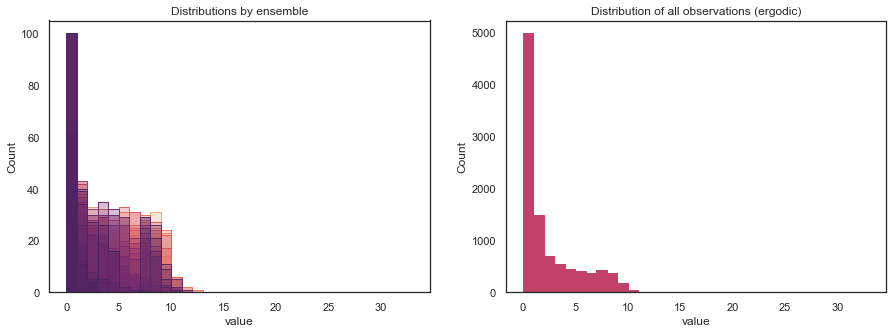

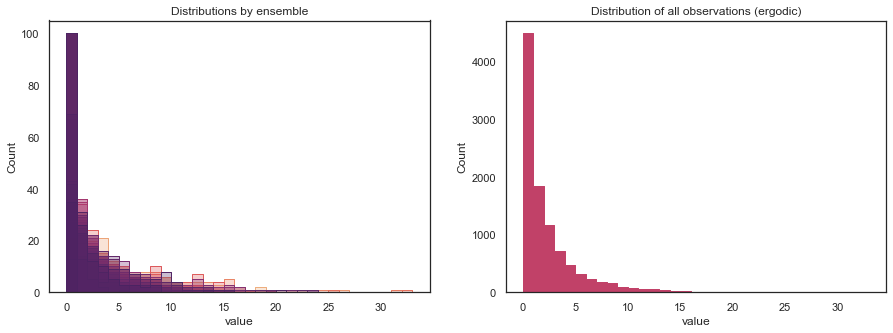

In [29]:
agents = 100
timesteps = 1000
ensembles = 100

initial = []
observations = []
for e in range(ensembles):
    model = MoneyModel(agents, np.random.randint(10))
    model.step()
    # save initial setup
    initial.append([a.wealth for a in model.schedule.agents])
    for i in range(timesteps):
        model.step()
    # save end setup
    observations.append([a.wealth for a in model.schedule.agents])

# convert to usable
initial = np.array(initial)
observations = np.array(observations)
bins = np.arange(observations.max()+2)

  
# create initial ee
ei = ErgodicEnsemble(initial, bins)
ei.stats()
ei.plot()

# create end ee
ee = ErgodicEnsemble(observations, bins)
ee.stats()
ee.plot()



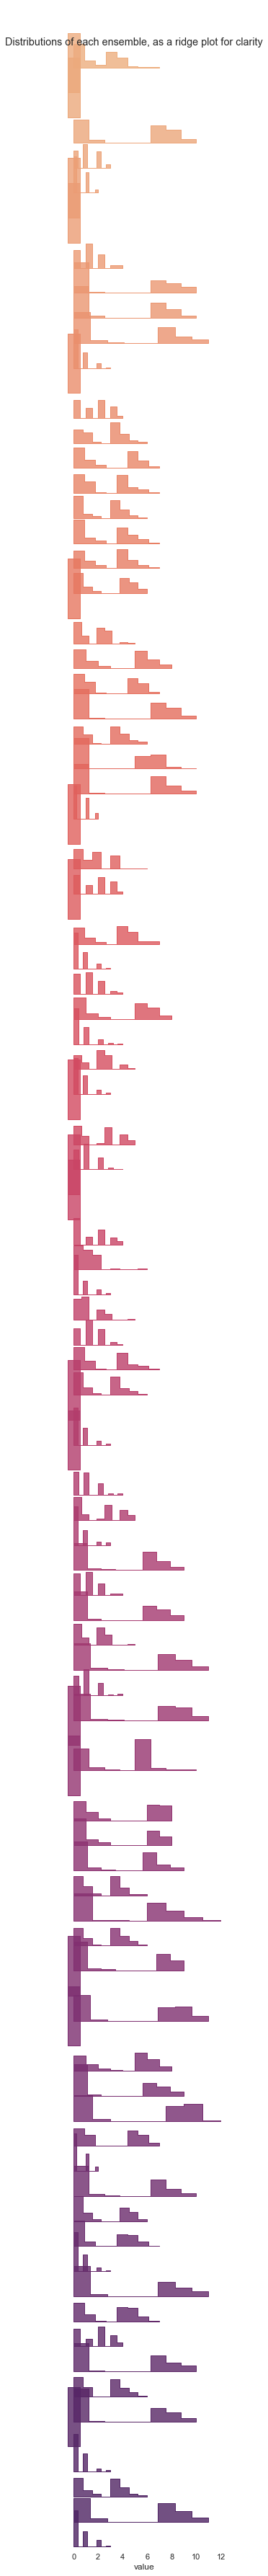

In [30]:
ei.plot(True)